In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2024-11-22 03:28:36.910714: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-22 03:28:37.749603: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-22 03:28:37.973468: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-22 03:28:39.561646: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-22 03:28:50.522574: W tensorflow/compiler/tf2

In [3]:
# Load the modelTesting
model = tf.keras.models.load_model('Testing/model_results/model_v9_correct_batch_normal.keras')
model.load_weights('Testing/model_results/model_v9_correct_batch_normal.weights.h5')

I0000 00:00:1732267811.275412    8262 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1732267813.600856    8262 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1732267813.600927    8262 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1732267813.606281    8262 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1732267813.606360    8262 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

In [16]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 24, 24, 8)      │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 24, 24, 8)      │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 24, 24, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 12, 12, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 16)       │         3,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 16)       │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 200)            │        51,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 47)             │         9,447 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,369 (251.45 KB)

 Trainable params: 64,319 (251.25 KB)

 Non-trainable params: 48 (192.00 B)

 Optimizer params: 2 (12.00 B)

In [27]:
IMAGE_WIDTH = 28
IMAGE_HEIGHT = 28
IMAGE_CHANNELS = 1

IMAGE_DIRECTORY = "Presentation_Data/set1/dataset"

dataset = tf.keras.preprocessing.image_dataset_from_directory(
	IMAGE_DIRECTORY,
	labels="inferred",
	label_mode="categorical", # one-hot encoding stuff
	image_size=(28, 28),
	color_mode="grayscale",
)

Found 235 files belonging to 47 classes.


In [28]:
# Mapping string used to decode the prediction labels
mapper = ['lower_0', 'lower_1', 'lower_2', 'lower_3', 'lower_4', 'lower_5', 'lower_6', 'lower_7', 'lower_8', 'lower_9', 'lower_a', 'lower_b', 'lower_d', 'lower_e', 'lower_f', 'lower_g', 'lower_h', 'lower_n', 'lower_q', 'lower_r', 'lower_t', 'upper_A', 'upper_B', 'upper_C', 'upper_D', 'upper_E', 'upper_F', 'upper_G', 'upper_H', 'upper_I', 'upper_J', 'upper_K', 'upper_L', 'upper_M', 'upper_N', 'upper_O', 'upper_P', 'upper_Q', 'upper_R', 'upper_S', 'upper_T', 'upper_U', 'upper_V', 'upper_W', 'upper_X', 'upper_Y', 'upper_Z']

In [29]:
# Normalize the dataset prior to the model

def normalize(image, label):
	image = tf.cast(image, tf.float32) / 255.0
	return image, label

normalized = dataset.map(normalize)

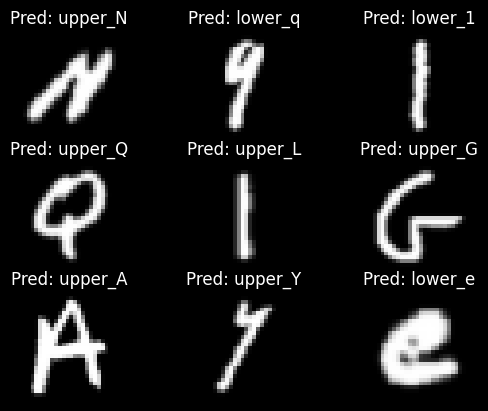

In [32]:
# # test_size = int(0.006 * len(dataset))
# test_size = 800
# test_dataset = dataset.take(test_size)

# Load some images
for images, labels in normalized.take(1):
	# show the first 9 images
	for i in range(9):
		plt.subplot(330 + 1 + i)
		plt.imshow(images[i], cmap=plt.get_cmap('gray'))
		predicted_label = np.argmax(labels[i])
		precise_label = dataset.class_names[predicted_label]
		plt.title(f"Pred: {precise_label}")
		plt.axis('off')
	plt.show()


In [33]:
# Predict using the model
predictions = model.predict(normalized)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [22]:
mapper[22]

'upper_B'

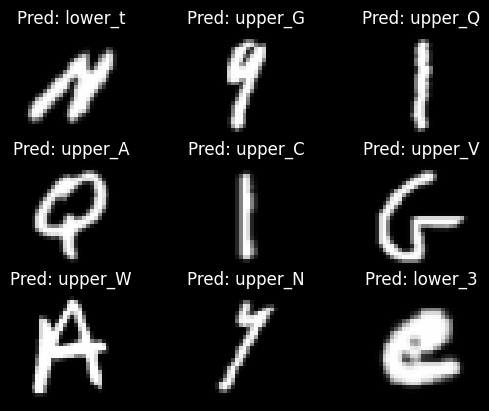

In [34]:
# Display the first 9 predictions
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(images[i].numpy(), cmap=plt.get_cmap('gray'))
	predicted_label = np.argmax(predictions[i])
	precise_label = mapper[predicted_label]
	plt.title(f"Pred: {precise_label}")
	plt.axis('off')
plt.show()